<a href="https://colab.research.google.com/github/piezga/MLPNS2021/blob/master/midtermipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
from sklearn.cluster  import KMeans
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import matplotlib.pyplot as plt


pl.rcParams['font.size'] = 18

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/MLPNS

/content/drive/MyDrive/MLPNS


In [4]:
countryPop = pd.read_excel('country_pop.xls', header = 3, index_col=0).drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1)

In [5]:
countryPop.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [6]:
countryPop.shape

(264, 61)

In [7]:
print("there are {} countries and {} time stamps in the data".
      format(*countryPop.shape))


there are 264 countries and 61 time stamps in the data


In [8]:
countryPop = countryPop.dropna(axis = 1, how ='all')

In [9]:
countryPop = countryPop.dropna(axis = 0, how ='any')

In [10]:
countryPop.shape

(258, 60)

In [11]:
countryPop.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [12]:
print("there are {} countries and {} time stamps in the data".
      format(*countryPop.shape))

there are 258 countries and 60 time stamps in the data


In [13]:
percLost = (1- 258*60/(264*60))*100

In [14]:
percLost

2.2727272727272707

this is actually an upper bound, since some of the values removed were NaN. If I have time at the end I will do it more precisely

In [15]:
countryPopTrans = countryPop.transpose()

I transposed the data so that I could directly use the comand "plot"

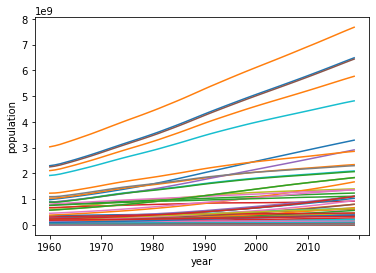

In [16]:
countryPopTrans.plot(legend = False, xlabel = 'year', ylabel = 'population')

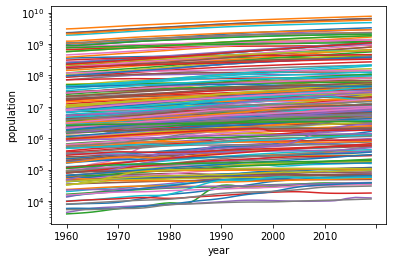

In [17]:
countryPopTrans.plot(legend = False,logy = True,xlabel = 'year', ylabel = 'population')

In [18]:
data = countryPop.sub(countryPop.mean(1), axis = 0).div(countryPop.std(1),axis = 0)

In [19]:
dataTrans = data.T

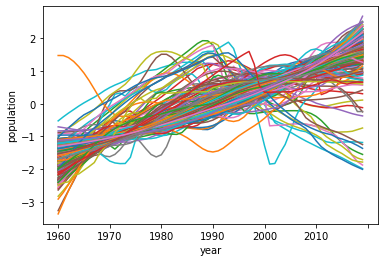

In [20]:
dataTrans.plot(xlabel = "year", ylabel = "population", legend = False)

In [21]:
data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,-1.145215,-1.081510,-1.040650,-1.016248,-0.998751,-0.981721,-0.963290,-0.945637,-0.928452,-0.910800,-0.893303,-0.873729,-0.852962,-0.832038,-0.817241,-0.810544,-0.814230,-0.825652,-0.839307,-0.845693,-0.839670,-0.815216,-0.774823,-0.730380,-0.697412,-0.687547,-0.707380,-0.749487,-0.788634,-0.791074,-0.733080,-0.604684,-0.417100,-0.195457,0.022396,0.210551,0.359871,0.476741,0.571546,0.661262,0.757209,0.863384,0.972102,1.077239,1.166540,1.233723,1.275414,1.295559,1.302620,1.307656,1.318767,1.338341,1.365027,1.396127,1.428057,1.457495,1.485064,1.510712,1.535582,1.559932
Afghanistan,-1.075473,-1.055671,-1.034767,-1.012746,-0.989597,-0.965305,-0.940211,-0.914363,-0.887131,-0.857651,-0.825513,-0.790855,-0.754593,-0.718104,-0.683195,-0.651476,-0.622316,-0.596109,-0.576599,-0.568577,-0.574840,-0.596066,-0.629271,-0.668866,-0.707157,-0.737713,-0.760913,-0.776031,-0.774484,-0.745674,-0.683269,-0.581443,-0.445186,-0.292333,-0.147740,-0.028893,0.056405,0.114247,0.157958,0.207691,0.277639,0.372612,0.486734,0.610769,0.730866,0.837387,0.926818,1.003470,1.074868,1.152099,1.242899,1.349916,1.469801,1.597063,1.723521,1.843274,1.954610,2.059487,2.160081,2.259916
Angola,-1.071226,-1.061428,-1.051562,-1.042484,-1.035369,-1.030821,-1.029458,-1.030351,-1.030682,-1.026637,-1.015486,-0.996232,-0.969634,-0.937835,-0.903987,-0.870369,-0.837662,-0.805118,-0.772223,-0.737998,-0.701743,-0.663448,-0.623444,-0.581822,-0.538727,-0.494276,-0.448434,-0.401181,-0.352690,-0.303185,-0.252800,-0.201530,-0.149242,-0.095774,-0.040897,0.015614,0.073925,0.134198,0.196671,0.261607,0.329273,0.399714,0.473149,0.550219,0.631719,0.718184,0.809878,0.906584,1.007747,1.112542,1.220322,1.330976,1.444555,1.560769,1.679306,1.799968,1.922615,2.047331,2.174446,2.304445
Albania,-2.289928,-2.183710,-2.076411,-1.969564,-1.862276,-1.756774,-1.653093,-1.546823,-1.428788,-1.305027,-1.193011,-1.083932,-0.968814,-0.857127,-0.745969,-0.632030,-0.520200,-0.405609,-0.295809,-0.188412,-0.075603,0.036986,0.158246,0.282546,0.408485,0.534141,0.654673,0.781655,0.903975,1.082269,1.204313,1.163176,1.122040,1.080903,1.039767,0.998630,0.957494,0.916356,0.875221,0.834083,0.792948,0.732854,0.713770,0.690039,0.663637,0.631455,0.592009,0.545085,0.497802,0.456574,0.426379,0.410080,0.400096,0.389039,0.376567,0.359070,0.349486,0.343979,0.329232,0.303854
Andorra,-1.620691,-1.579723,-1.537439,-1.493156,-1.448237,-1.402340,-1.355678,-1.308463,-1.260356,-1.210720,-1.158958,-1.104434,-1.047785,-0.990839,-0.936102,-0.885743,-0.840186,-0.797944,-0.756891,-0.710952,-0.657873,-0.596974,-0.528383,-0.453886,-0.375733,-0.295243,-0.213776,-0.131416,-0.047314,0.038275,0.125862,0.217741,0.311958,0.400479,0.472980,0.522829,0.544503,0.543100,0.535238,0.544928,0.588275,0.671187,0.786270,0.919414,1.049540,1.161011,1.251360,1.323223,1.373284,1.398825,1.398230,1.368397,1.312301,1.242053,1.175715,1.124633,1.094290,1.081711,1.081923,1.087703


In [22]:
numdata = data.values

In [23]:
numdata

array([[-1.14521491, -1.08151004, -1.04064962, ...,  1.5107123 ,
         1.5355816 ,  1.55993171],
       [-1.07547266, -1.05567067, -1.03476694, ...,  2.05948658,
         2.16008138,  2.25991619],
       [-1.07122559, -1.06142783, -1.05156248, ...,  2.04733076,
         2.1744465 ,  2.30444489],
       ...,
       [-1.53053672, -1.4972348 , -1.46263913, ...,  1.59823342,
         1.65933141,  1.72038838],
       [-1.30441808, -1.28240727, -1.25974522, ...,  1.93837462,
         2.05557375,  2.17537833],
       [-1.67413814, -1.63594039, -1.5960124 , ...,  1.43876852,
         1.4989648 ,  1.56040416]])

In [24]:
def parabola(x,a,b,c): 
    return a*x**2 + b*c + c


In [25]:
def fitfunc(args,x,y):
    a,b,c = args
    return sum((y-parabola(x,a,b,c)**2))

In [26]:
guess = (1,1,0)

In [27]:
x = np.arange(0,60)

In [28]:
fitparams = []

In [29]:
for i in np.arange(0,258):
  solution = minimize(fitfunc, guess, args=(x,numdata[i]))
  fitparams.append(solution.x)

In [30]:
fitparams = np.array(fitparams)